<a href="https://colab.research.google.com/github/Uliana-san/Japan/blob/master/Zorge_collocate_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Загрузка необходимых библиотек
import pandas as pd
!pip install gensim
import gensim
import re
from collections import Counter
import matplotlib.pyplot as plt
!pip install docx2txt
import docx2txt
import nltk
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt_tab')
!pip install pymorphy3
from pymorphy3 import MorphAnalyzer
morph = MorphAnalyzer()
stopwords_ru = stopwords.words('russian') + ['это', 'мочь', 'который', 'всё', 'весь', 'ещё', 'ваш', 'свой', 'каждый', 'как', 'так', 'было', 'в', 'В', 'и', 'это', 'такой', 'год'
                                            ]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 23.9 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.9/53.9 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 97.1 MB/s eta 0:00:00


In [2]:
telegr8 = '/content/Телеграммы 41-44 ПОСЛЕ.txt'

In [3]:
telegr1 = '/content/Телеграммы 31-33.txt'

In [4]:
telegr2 = '/content/Телеграммы 34-35.txt'

In [16]:
telegr3 = '/content/Телеграммы 36.txt'

In [80]:
#Открываем файл txt и немного предобрабатываем
with open(telegr8, encoding='utf-8') as txt:
    text = txt.read()
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'[^А-Яа-я -]', '', text.lower())
    text = ' '.join([morph.parse(token)[0].normal_form for token in word_tokenize(text) if token not in stopwords_ru and len(token) > 2])

In [97]:
with open(telegr1, encoding='utf-8') as txt:
    text1 = txt.read()
    text1 = re.sub(r'\n', ' ', text1)
    text1 = re.sub(r'[^А-Яа-я -]', '', text1.lower())
    text1 = ' '.join([morph.parse(token)[0].normal_form for token in word_tokenize(text1) if token not in stopwords_ru and len(token) > 2])

In [144]:
with open(telegr2, encoding='utf-8') as txt:
    text = txt.read()
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'[^А-Яа-я -]', '', text.lower())
    text = ' '.join([morph.parse(token)[0].normal_form for token in word_tokenize(text) if token not in stopwords_ru and len(token) > 2])

In [17]:
with open(telegr3, encoding='utf-8') as txt:
    text = txt.read()
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'[^А-Яа-я -]', '', text.lower())
    text = ' '.join([morph.parse(token)[0].normal_form for token in word_tokenize(text) if token not in stopwords_ru and len(token) > 2])

In [18]:
#Пишем функцию для составления коллокатов
def skipgrammer(telegr3, window_size):
    skip_grams = []
    tokens = word_tokenize(telegr3)
    for index in range(len(tokens)):
        target_word = tokens[index]
        start = max(0, index - window_size)
        end = min(len(tokens), index + window_size + 1)

        for s_index in range(start, end):
            if index != s_index:
                context = tokens[s_index]
                skip_grams.append((target_word, context))
    return skip_grams

In [82]:
#Используем на нашем тексте с окном в 5 слов
skip_grams_zorg_dang41 = skipgrammer(text, 5)

In [133]:
skip_grams_zorg_dang31 = skipgrammer(text1, 5)

In [146]:
skip_grams_zorg_dang34 = skipgrammer(text, 5)

In [19]:
skip_grams_zorg_dang36 = skipgrammer(text, 5)

In [25]:
#Смотрим ключевое слово "опасность 1936"
target = 'опасность'
target_skipgrams = []
for skipgram in skip_grams_zorg_dang36:
    if skipgram[0] == target or skipgram[1] == target:
        target_skipgrams.append(skipgram)

target_skipgram_counts = Counter(target_skipgrams)
print(target_skipgram_counts.most_common())

[(('опасность', 'ваш'), 4), (('ваш', 'опасность'), 4), (('опасность', 'рамзай'), 4), (('рамзай', 'опасность'), 4), (('опасность', 'провал'), 3), (('провал', 'опасность'), 3), (('сам', 'опасность'), 3), (('понимать', 'опасность'), 3), (('опасность', 'сам'), 3), (('опасность', 'понимать'), 3), (('инцидент', 'опасность'), 2), (('опасность', 'инцидент'), 2), (('опасность', 'существовать'), 2), (('существовать', 'опасность'), 2), (('такой', 'опасность'), 2), (('опасность', 'такой'), 2), (('свой', 'опасность'), 2), (('опасность', 'свой'), 2), (('опасность', 'должный'), 2), (('должный', 'опасность'), 2), (('опасность', 'вопрос'), 2), (('вопрос', 'опасность'), 2), (('думать', 'опасность'), 2), (('опасность', 'думать'), 2), (('опасность', 'туземный'), 2), (('опасность', 'связь'), 2), (('туземный', 'опасность'), 2), (('связь', 'опасность'), 2), (('опасность', 'опыт'), 2), (('опыт', 'опасность'), 2), (('человек', 'опасность'), 2), (('опасность', 'человек'), 2), (('отт', 'опасность'), 1), (('несмо

In [26]:
#Библиотеки для визуализации
import networkx as nx
import matplotlib.pyplot as plt

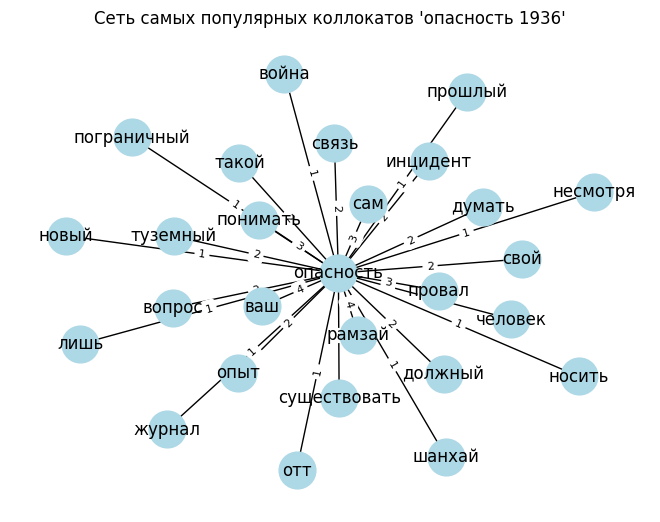

In [33]:
G = nx.Graph()
for (word1, word2), count in target_skipgram_counts.most_common(50):
        G.add_edge(word1, word2, weight=count)
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=700, font_size=12)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)
plt.title("Сеть самых популярных коллокатов 'опасность 1936'")
plt.show()

In [150]:
#Смотрим ключевое слово "Зорге 1941 после"
target = 'зорг'
target_skipgrams = []
for skipgram in skip_grams_zorg_dang41:
    if skipgram[0] == target or skipgram[1] == target:
        target_skipgrams.append(skipgram)

target_skipgram_counts = Counter(target_skipgrams)
print(target_skipgram_counts.most_common())

[(('письмо', 'зорг'), 3), (('зорг', 'письмо'), 3), (('помощник', 'зорг'), 3), (('зорг', 'помощник'), 3), (('зорг', 'который'), 3), (('который', 'зорг'), 3), (('ответить', 'зорг'), 2), (('уклончиво', 'зорг'), 2), (('заговорить', 'зорг'), 2), (('зорг', 'ответить'), 2), (('зорг', 'уклончиво'), 2), (('зорг', 'заговорить'), 2), (('зорг', 'сведение'), 2), (('зорг', 'зорг'), 2), (('зорг', 'якобы'), 2), (('зорг', 'неточный'), 2), (('зорг', 'часто'), 2), (('сведение', 'зорг'), 2), (('якобы', 'зорг'), 2), (('неточный', 'зорг'), 2), (('часто', 'зорг'), 2), (('зорг', 'вечер'), 2), (('зорг', 'ресторан'), 2), (('вечер', 'зорг'), 2), (('ресторан', 'зорг'), 2), (('зорг', 'урицкий'), 2), (('зорг', 'недовольный'), 2), (('зорг', 'сказать'), 2), (('урицкий', 'зорг'), 2), (('недовольный', 'зорг'), 2), (('сказать', 'зорг'), 2), (('остров', 'зорг'), 1), (('качество', 'зорг'), 1), (('художник', 'зорг'), 1), (('писать', 'зорг'), 1), (('отчёт', 'зорг'), 1), (('зорг', 'остров'), 1), (('зорг', 'качество'), 1), ((

In [107]:
#Смотрим ключевое слово "Зорге 1931-1933"
target = 'зорг'
target_skipgrams = []
for skipgram in skip_grams_zorg_dang31:
    if skipgram[0] == target or skipgram[1] == target:
        target_skipgrams.append(skipgram)

target_skipgram_counts = Counter(target_skipgrams)
print(target_skipgram_counts.most_common())

[(('мой', 'зорг'), 5), (('зорг', 'мой'), 5), (('зорг', 'дом'), 5), (('дом', 'зорг'), 5), (('зорг', 'помнить'), 4), (('зорг', 'зорг'), 4), (('помнить', 'зорг'), 4), (('зорг', 'знать'), 3), (('знать', 'зорг'), 3), (('зорг', 'работа'), 3), (('работа', 'зорг'), 3), (('зорг', 'имя'), 3), (('имя', 'зорг'), 3), (('зорг', 'который'), 2), (('который', 'зорг'), 2), (('фэн', 'зорг'), 2), (('зорг', 'фэн'), 2), (('зорг', 'тяжёлый'), 2), (('тяжёлый', 'зорг'), 2), (('зорг', 'секретарь'), 2), (('секретарь', 'зорг'), 2), (('д-р', 'зорг'), 2), (('зорг', 'д-р'), 2), (('зорг', 'такой'), 2), (('зорг', 'кроме'), 2), (('зорг', 'один'), 2), (('такой', 'зорг'), 2), (('кроме', 'зорг'), 2), (('один', 'зорг'), 2), (('зорг', 'проходить'), 2), (('зорг', 'дорога'), 2), (('зорг', 'возле'), 2), (('проходить', 'зорг'), 2), (('дорога', 'зорг'), 2), (('возле', 'зорг'), 2), (('зорг', 'выйти'), 2), (('зорг', 'увидеть'), 2), (('выйти', 'зорг'), 2), (('увидеть', 'зорг'), 2), (('известный', 'зорг'), 1), (('азиатикус', 'зорг')

In [151]:
#Смотрим ключевое слово "Зорге 1934-1935"
target = 'зорг'
target_skipgrams = []
for skipgram in skip_grams_zorg_dang34:
    if skipgram[0] == target or skipgram[1] == target:
        target_skipgrams.append(skipgram)

target_skipgram_counts = Counter(target_skipgrams)
print(target_skipgram_counts.most_common())

[(('письмо', 'зорг'), 3), (('зорг', 'письмо'), 3), (('помощник', 'зорг'), 3), (('зорг', 'помощник'), 3), (('зорг', 'который'), 3), (('который', 'зорг'), 3), (('ответить', 'зорг'), 2), (('уклончиво', 'зорг'), 2), (('заговорить', 'зорг'), 2), (('зорг', 'ответить'), 2), (('зорг', 'уклончиво'), 2), (('зорг', 'заговорить'), 2), (('зорг', 'сведение'), 2), (('зорг', 'зорг'), 2), (('зорг', 'якобы'), 2), (('зорг', 'неточный'), 2), (('зорг', 'часто'), 2), (('сведение', 'зорг'), 2), (('якобы', 'зорг'), 2), (('неточный', 'зорг'), 2), (('часто', 'зорг'), 2), (('зорг', 'вечер'), 2), (('зорг', 'ресторан'), 2), (('вечер', 'зорг'), 2), (('ресторан', 'зорг'), 2), (('зорг', 'урицкий'), 2), (('зорг', 'недовольный'), 2), (('зорг', 'сказать'), 2), (('урицкий', 'зорг'), 2), (('недовольный', 'зорг'), 2), (('сказать', 'зорг'), 2), (('остров', 'зорг'), 1), (('качество', 'зорг'), 1), (('художник', 'зорг'), 1), (('писать', 'зорг'), 1), (('отчёт', 'зорг'), 1), (('зорг', 'остров'), 1), (('зорг', 'качество'), 1), ((

In [72]:
#Смотрим ключевое слово "Зорге 1936"
target = 'арест'
target_skipgrams = []
for skipgram in skip_grams_zorg_dang36:
    if skipgram[0] == target or skipgram[1] == target:
        target_skipgrams.append(skipgram)

target_skipgram_counts = Counter(target_skipgrams)
print(target_skipgram_counts.most_common())

[(('арест', 'арест'), 4), (('арест', 'мой'), 4), (('мой', 'арест'), 4), (('арест', 'подозрение'), 3), (('подозрение', 'арест'), 3), (('ликвидировать', 'арест'), 2), (('абрам', 'арест'), 2), (('арест', 'ликвидировать'), 2), (('арест', 'абрам'), 2), (('несколько', 'арест'), 2), (('причина', 'арест'), 2), (('арест', 'несколько'), 2), (('арест', 'причина'), 2), (('вполне', 'арест'), 2), (('достаточно', 'арест'), 2), (('производить', 'арест'), 2), (('арест', 'вполне'), 2), (('арест', 'достаточно'), 2), (('арест', 'производить'), 2), (('арест', 'свет'), 2), (('арест', 'божий'), 2), (('арест', 'появляться'), 2), (('арест', 'опасаться'), 2), (('свет', 'арест'), 2), (('божий', 'арест'), 2), (('появляться', 'арест'), 2), (('опасаться', 'арест'), 2), (('мрачный', 'арест'), 2), (('картина', 'арест'), 2), (('лично', 'арест'), 2), (('бояться', 'арест'), 2), (('арест', 'мрачный'), 2), (('арест', 'картина'), 2), (('арест', 'лично'), 2), (('арест', 'бояться'), 2), (('арест', 'разный'), 2), (('арест', '

In [35]:
#Библиотеки для визуализации
import networkx as nx
import matplotlib.pyplot as plt

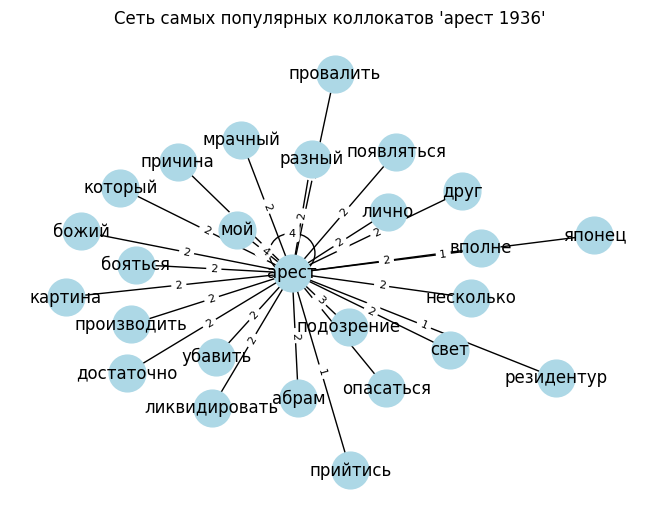

In [74]:
G = nx.Graph()
for (word1, word2), count in target_skipgram_counts.most_common(50):
        G.add_edge(word1, word2, weight=count)
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=700, font_size=12)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)
plt.title("Сеть самых популярных коллокатов 'арест 1936'")
plt.show()

In [155]:
#Читаем файл 1941 после для последующей векторизации. Предобрабатываем
corpus = []
with open(telegr8, encoding='utf-8') as txt:
        text = txt.read()
        text = re.sub(r'\n', ' ', text)
        text = re.sub(r'[^А-Яа-я -]', '', text.lower())
        text = [morph.parse(token)[0].normal_form for token in word_tokenize(text) if token not in stopwords_ru and len(token) > 2]
        corpus.append(text)

In [124]:
#Читаем файл 1931-1933 для последующей векторизации. Предобрабатываем
corpus1 = []
with open(telegr1, encoding='utf-8') as txt:
        text = txt.read()
        text = re.sub(r'\n', ' ', text)
        text = re.sub(r'[^А-Яа-я -]', '', text.lower())
        text = [morph.parse(token)[0].normal_form for token in word_tokenize(text) if token not in stopwords_ru and len(token) > 2]
        corpus1.append(text)

In [156]:
#Читаем файл 1934-1935 для последующей векторизации. Предобрабатываем
corpus2 = []
with open(telegr2, encoding='utf-8') as txt:
        text = txt.read()
        text = re.sub(r'\n', ' ', text)
        text = re.sub(r'[^А-Яа-я -]', '', text.lower())
        text = [morph.parse(token)[0].normal_form for token in word_tokenize(text) if token not in stopwords_ru and len(token) > 2]
        corpus2.append(text)

In [65]:
#Читаем файл 1936 для последующей векторизации. Предобрабатываем
corpus3 = []
with open(telegr3, encoding='utf-8') as txt:
        text = txt.read()
        text = re.sub(r'\n', ' ', text)
        text = re.sub(r'[^А-Яа-я -]', '', text.lower())
        text = [morph.parse(token)[0].normal_form for token in word_tokenize(text) if token not in stopwords_ru and len(token) > 2]
        corpus3.append(text)

In [67]:
#Обучаем модель
w2v1 = gensim.models.Word2Vec(corpus3)

In [68]:
#Ищем ассоциаты слов
w2v1.wv.most_similar('опасность')

[('один', 0.9974566698074341),
 ('наш', 0.9974126219749451),
 ('положение', 0.9973791837692261),
 ('должный', 0.997360348701477),
 ('очень', 0.9973351955413818),
 ('левый', 0.9973304867744446),
 ('этот', 0.9973213076591492),
 ('находиться', 0.9973127841949463),
 ('мой', 0.9973046183586121),
 ('иметь', 0.9972847700119019)]

In [69]:
w2v1.wv.most_similar('арест')

[('иметься', 0.9976173043251038),
 ('рамзай', 0.997610330581665),
 ('фриц', 0.9975894689559937),
 ('получить', 0.9975829124450684),
 ('случай', 0.9975783824920654),
 ('ингрид', 0.9975547790527344),
 ('дать', 0.9975129961967468),
 ('отношение', 0.9975073337554932),
 ('свой', 0.9975022673606873),
 ('интерес', 0.997490406036377)]

In [70]:
w2v1.wv.most_similar('токио')

[('являться', 0.9991585612297058),
 ('рамзай', 0.9991552829742432),
 ('вопрос', 0.9991409182548523),
 ('свой', 0.9991294145584106),
 ('отношение', 0.9991166591644287),
 ('японский', 0.9991047978401184),
 ('переговоры', 0.9990963339805603),
 ('жена', 0.9990939497947693),
 ('кот', 0.9990895986557007),
 ('наш', 0.999087393283844)]

In [71]:
w2v1.wv.most_similar('ссср')

[('рамзаесть', 0.9953715205192566),
 ('иметь', 0.9953518509864807),
 ('послать', 0.9952806830406189),
 ('почта', 0.995254397392273),
 ('армия', 0.9951874017715454),
 ('военный', 0.9951809048652649),
 ('данные', 0.9951754808425903),
 ('рамзай', 0.9951563477516174),
 ('год', 0.9951258301734924),
 ('курьер', 0.9951152801513672)]

In [75]:
w2v1.wv.most_similar('подозрение')

[('такой', 0.993704080581665),
 ('круг', 0.9937025308609009),
 ('резидентур', 0.9935696125030518),
 ('я', 0.9935243129730225),
 ('иметься', 0.9935106039047241),
 ('ваш', 0.9935095906257629),
 ('кроме', 0.993508517742157),
 ('написать', 0.9934951663017273),
 ('писать', 0.9934935569763184),
 ('особенно', 0.9934626817703247)]

In [165]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [166]:
with open('/content/Телеграммы 41-44 ПОСЛЕ.txt', encoding='utf-8') as txt:
    text = txt.read()

In [167]:
text = text.lower()
text = re.sub(r'[0-9]+', '', text)
tokens = word_tokenize(text)
stop_words = set(stopwords.words('russian'))
tokens = [word for word in tokens if not word in stop_words and word.isalnum()]

In [168]:
clean_texts = []
text_no_stop = ' '.join([token for token in word_tokenize(text) if token not in stop_words])
clean_texts.append(text_no_stop)

In [169]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 1))
tfidf_matrix = tfidf_vectorizer.fit_transform(clean_texts)
feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf = tfidf_matrix.toarray().flatten()
top_indices = tfidf.argsort()[-20:][::-1]
print([(feature_names[i], tfidf[i]) for i in top_indices])

[('зорге', np.float64(0.6751502296041876)), ('токио', np.float64(0.1996923214322245)), ('года', np.float64(0.1521465306150282)), ('японии', np.float64(0.13312821428814967)), ('клауссена', np.float64(0.12361905612471041)), ('ссср', np.float64(0.09509158163439262)), ('клауссен', np.float64(0.09509158163439262)), ('связи', np.float64(0.09509158163439262)), ('отт', np.float64(0.08558242347095336)), ('германии', np.float64(0.08558242347095336)), ('вопросам', np.float64(0.08558242347095336)), ('времени', np.float64(0.08558242347095336)), ('арестован', np.float64(0.08558242347095336)), ('японской', np.float64(0.0760732653075141)), ('сведения', np.float64(0.0760732653075141)), ('установлено', np.float64(0.0760732653075141)), ('жена', np.float64(0.06656410714407483)), ('связь', np.float64(0.06656410714407483)), ('партии', np.float64(0.06656410714407483)), ('которые', np.float64(0.06656410714407483))]
